In [2]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression


In [3]:
df = pd.read_csv('results/peerProxyLatency.csv')
df = df[df['Trials'] != 500]

<Axes: xlabel='Trials'>

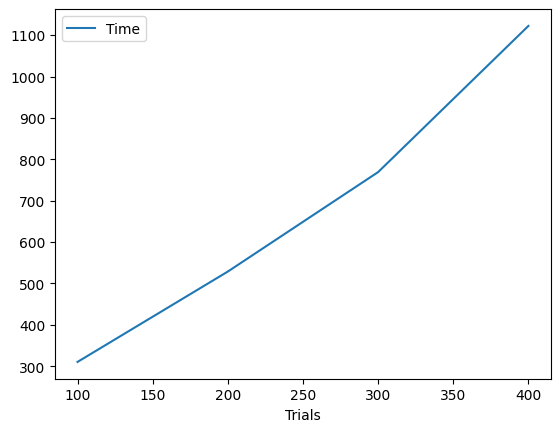

In [4]:
# todo: make one for each size
df[df['Size Response (bytes)'] == 16].plot(x='Trials', y='Time', kind="line")

In [5]:
byTrial = df.groupby('Trials').mean()
byTrial

,Size Response (bytes),Time,Average Latency (ms),Num Packets Transferred
Trials,,,,
100,33545.0,1562.30,15.623000,0.54598
200,33545.0,3072.64,15.363200,0.54598
300,33545.0,4588.52,15.295067,0.54598
400,33545.0,6293.42,15.733550,0.54598


<Axes: xlabel='Trials'>

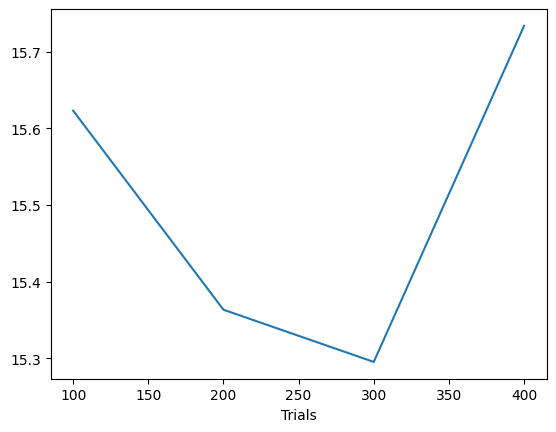

In [6]:
# graph trials by time
byTrial['Average Latency (ms)'].plot(kind='line')

In [7]:
bySize = df.groupby('Size Response (bytes)').mean()
bySize

,Trials,Time,Average Latency (ms),Num Packets Transferred
Size Response (bytes),,,,
1,250.0,1432.750,5.825937,0.000016
4,250.0,671.175,2.736792,0.000065
16,250.0,682.650,2.779542,0.000260
63,250.0,668.175,2.749000,0.001025
251,250.0,636.275,2.604729,0.004085
1000,250.0,664.025,2.761500,0.016276
3981,250.0,964.475,5.306396,0.064795
15849,250.0,2177.475,8.260583,0.257959
63096,250.0,6682.350,26.322667,1.026953


In [8]:
# make a plot that is a scatter plot and add regression line
def plot_with_regression(df):
    X = df['Size Response (bytes)']
    y = df['Average Latency (ms)']

    model = LinearRegression()
    model.fit(X.values.reshape(-1, 1), y)

    plt.figure(figsize=(10, 5))
    plt.scatter(X, y)
    plt.plot(X, model.predict(X.values.reshape(-1, 1)), color='red', linestyle='--')
    plt.xlabel('Size Response (bytes)')
    plt.ylabel('Average Latency (ms)')
    r_squared = model.score(X.values.reshape(-1, 1), y)

    print(r_squared)
    print("Slope: ", model.coef_[0])
    print("Intercept: ", model.intercept_)


0.9940518002339755
Slope:  0.00036817934053236424
Intercept:  3.153128188493856


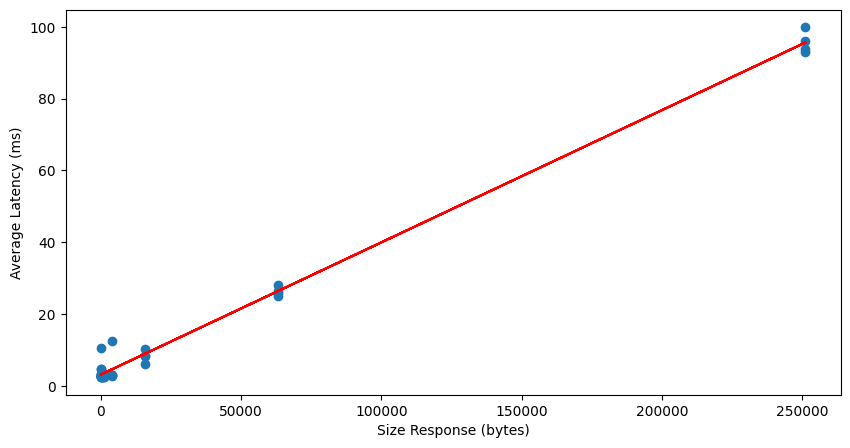

In [9]:
# TODO: make plot with consistent trial size (300)

plot_with_regression(df)

In [10]:
ngrok = pd.read_csv('results/ngrokLatency.csv')
ngrok

,Trials,Size Response (bytes),Time,Average Latency (ms),Num Packets Transferred
0,100,1,259.4,2.594000,0.000016
1,100,4,296.6,2.966000,0.000065
2,100,16,326.5,3.265000,0.000260
3,100,63,358.8,3.588000,0.001025
4,100,251,222.3,2.223000,0.004085
5,100,1000,301.1,3.011000,0.016276
6,100,3981,289.4,2.894000,0.064795
7,100,15849,297.7,2.977000,0.257959
8,100,63096,307.6,3.076000,1.026953
9,100,251189,354.5,3.545000,4.088363


<Axes: xlabel='Trials'>

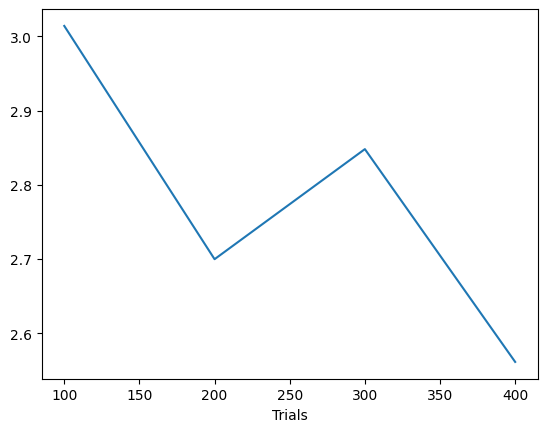

In [11]:
ngrok.groupby('Trials').mean()['Average Latency (ms)'].plot(kind='line')

0.2189768838730729
Slope:  3.934033738057724e-06
Intercept:  2.6489057549298534


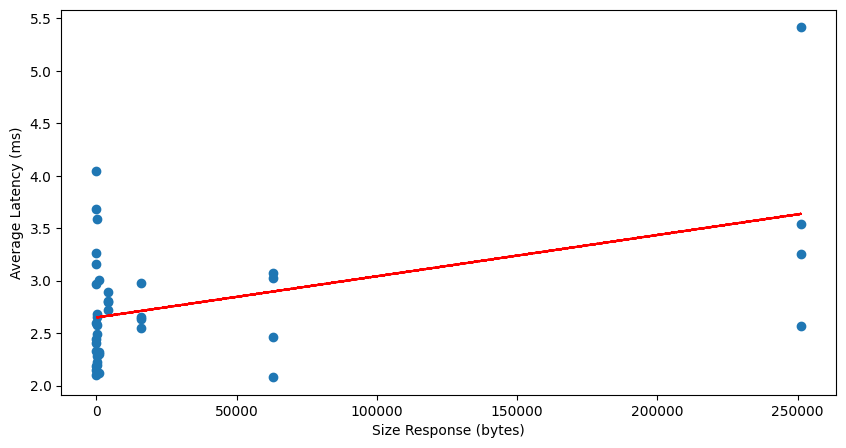

In [12]:
plot_with_regression(ngrok)

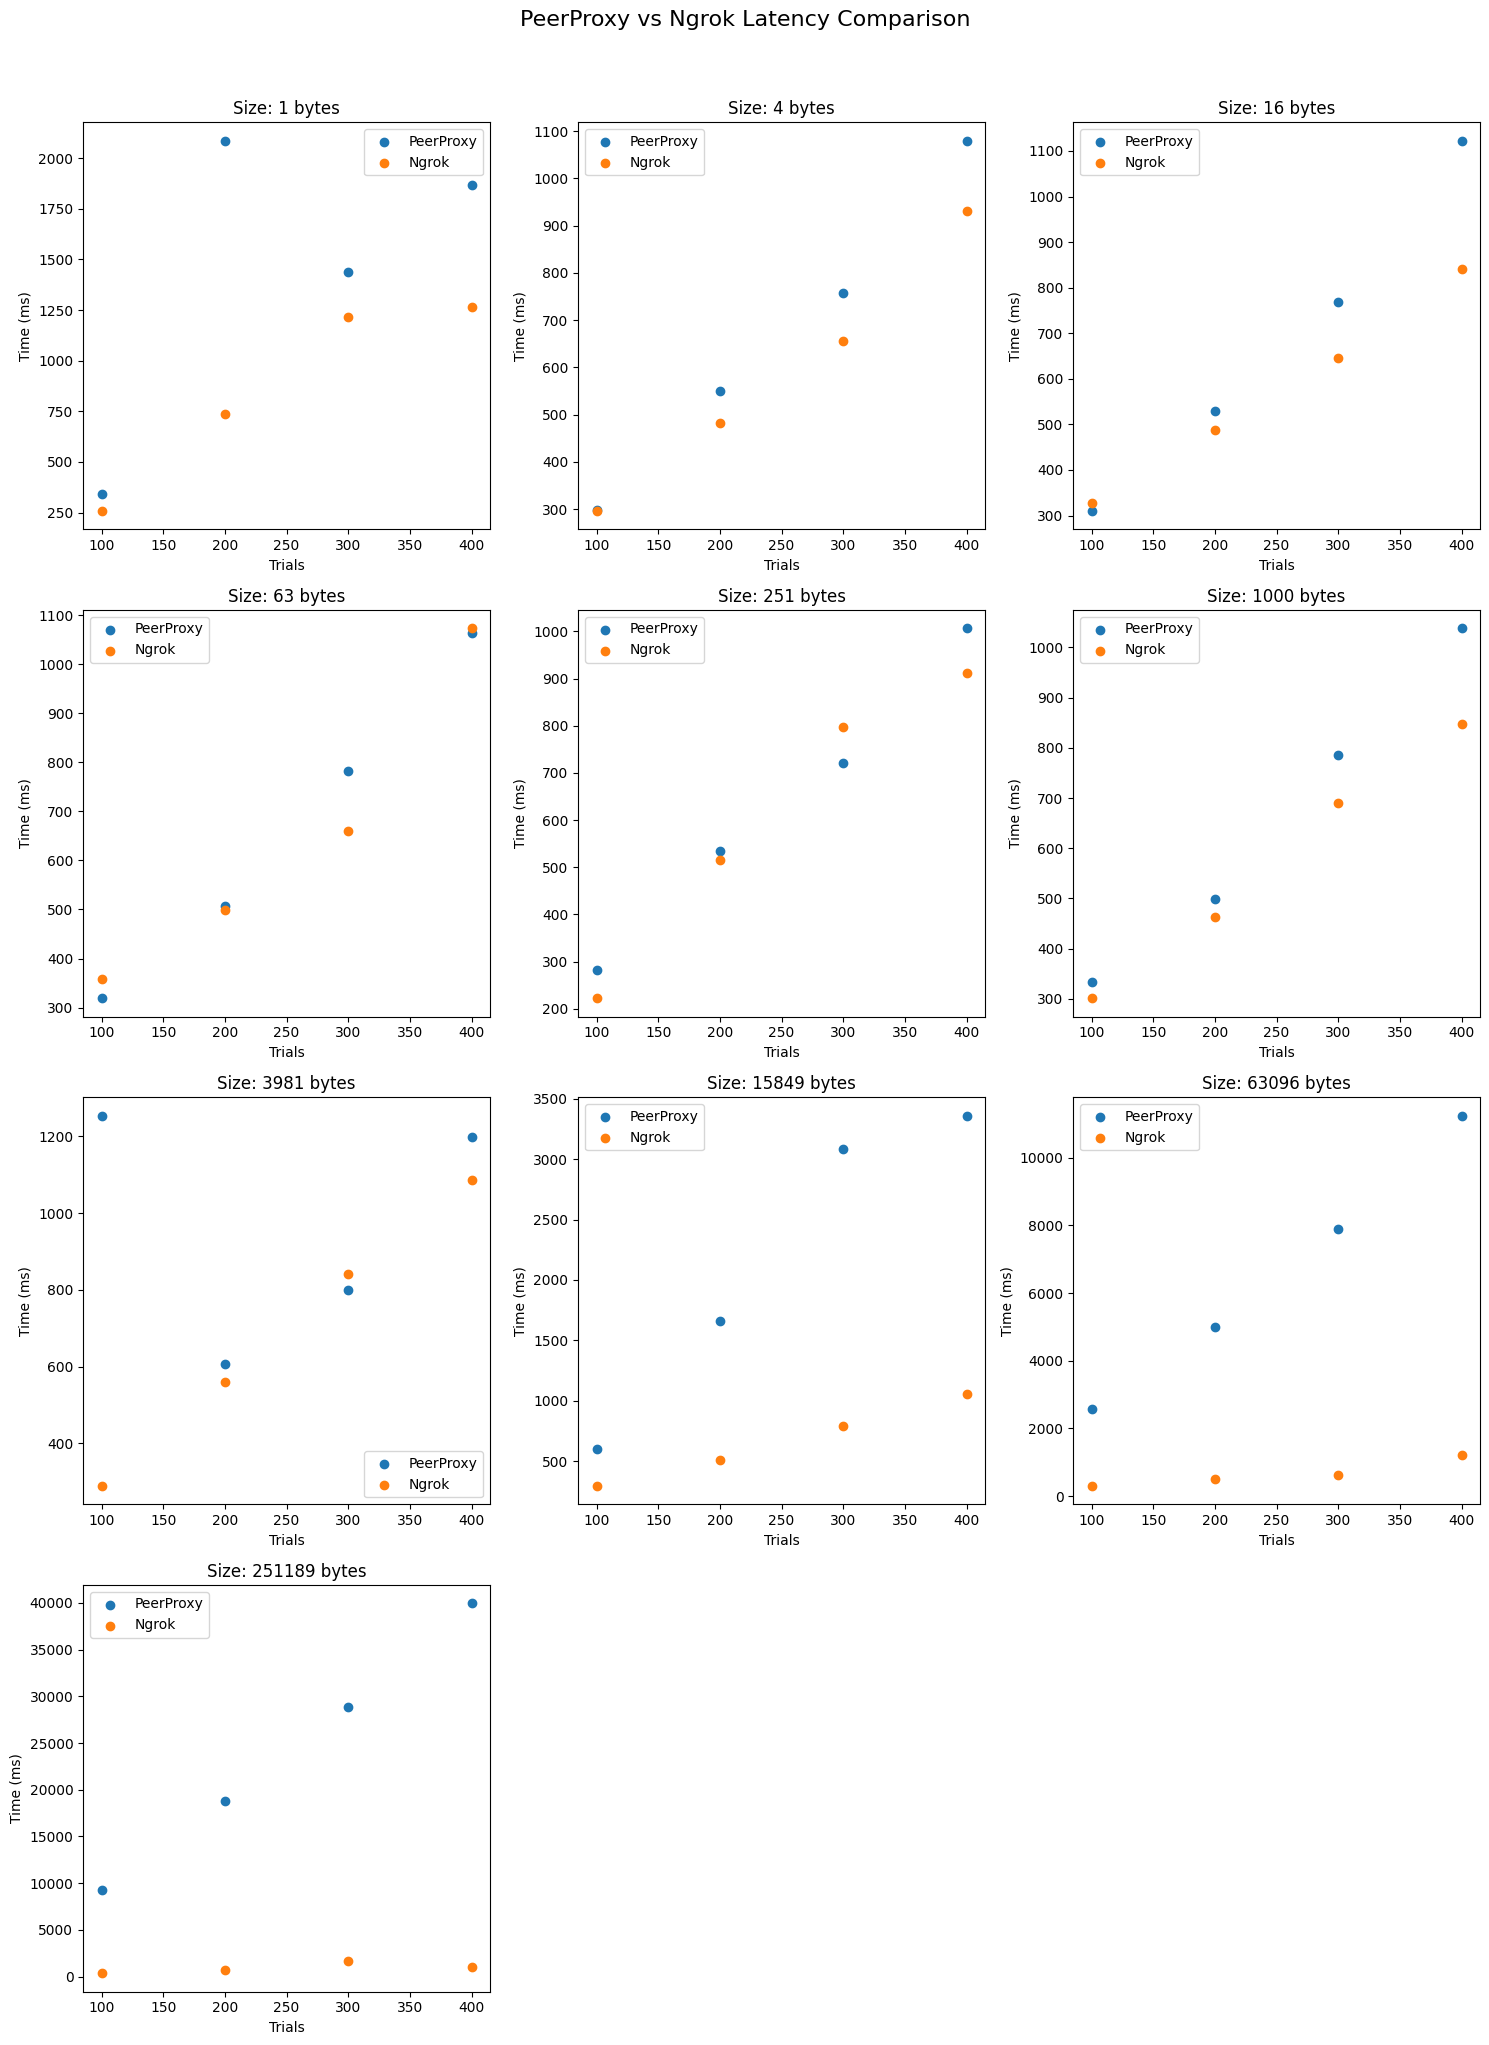

In [13]:
def plot_latency_comparison(dfs, labels, title, n_cols=3, figsize=(15, 5)):
    # Get unique Size Response (bytes) values from the first dataframe
    sizes = sorted(dfs[0]['Size Response (bytes)'].unique())

    # Calculate grid dimensions
    n_plots = len(sizes)
    n_rows = (n_plots + n_cols - 1) // n_cols

    # Create subplots
    fig, axes = plt.subplots(n_rows, n_cols, figsize=(figsize[0], figsize[1] * n_rows))
    fig.suptitle(title, fontsize=16, y=1.02)

    # Add more space between title and subplots
    plt.subplots_adjust(top=0.95)

    # Flatten the axes array for easier iteration
    axes = axes.flatten()

    for i, size in enumerate(sizes):
        ax = axes[i]
        
        for df, label in zip(dfs, labels):
            df_size = df[df['Size Response (bytes)'] == size]
            ax.scatter(df_size['Trials'], df_size['Time'], label=label)
        
        ax.set_xlabel('Trials')
        ax.set_ylabel('Time (ms)')
        ax.set_title(f'Size: {size} bytes')
        ax.legend()

    # Remove any unused subplots
    for j in range(i+1, len(axes)):
        fig.delaxes(axes[j])

    plt.tight_layout()
    plt.show()


plot_latency_comparison([df, ngrok], ['PeerProxy', 'Ngrok'], 'PeerProxy vs Ngrok Latency Comparison')

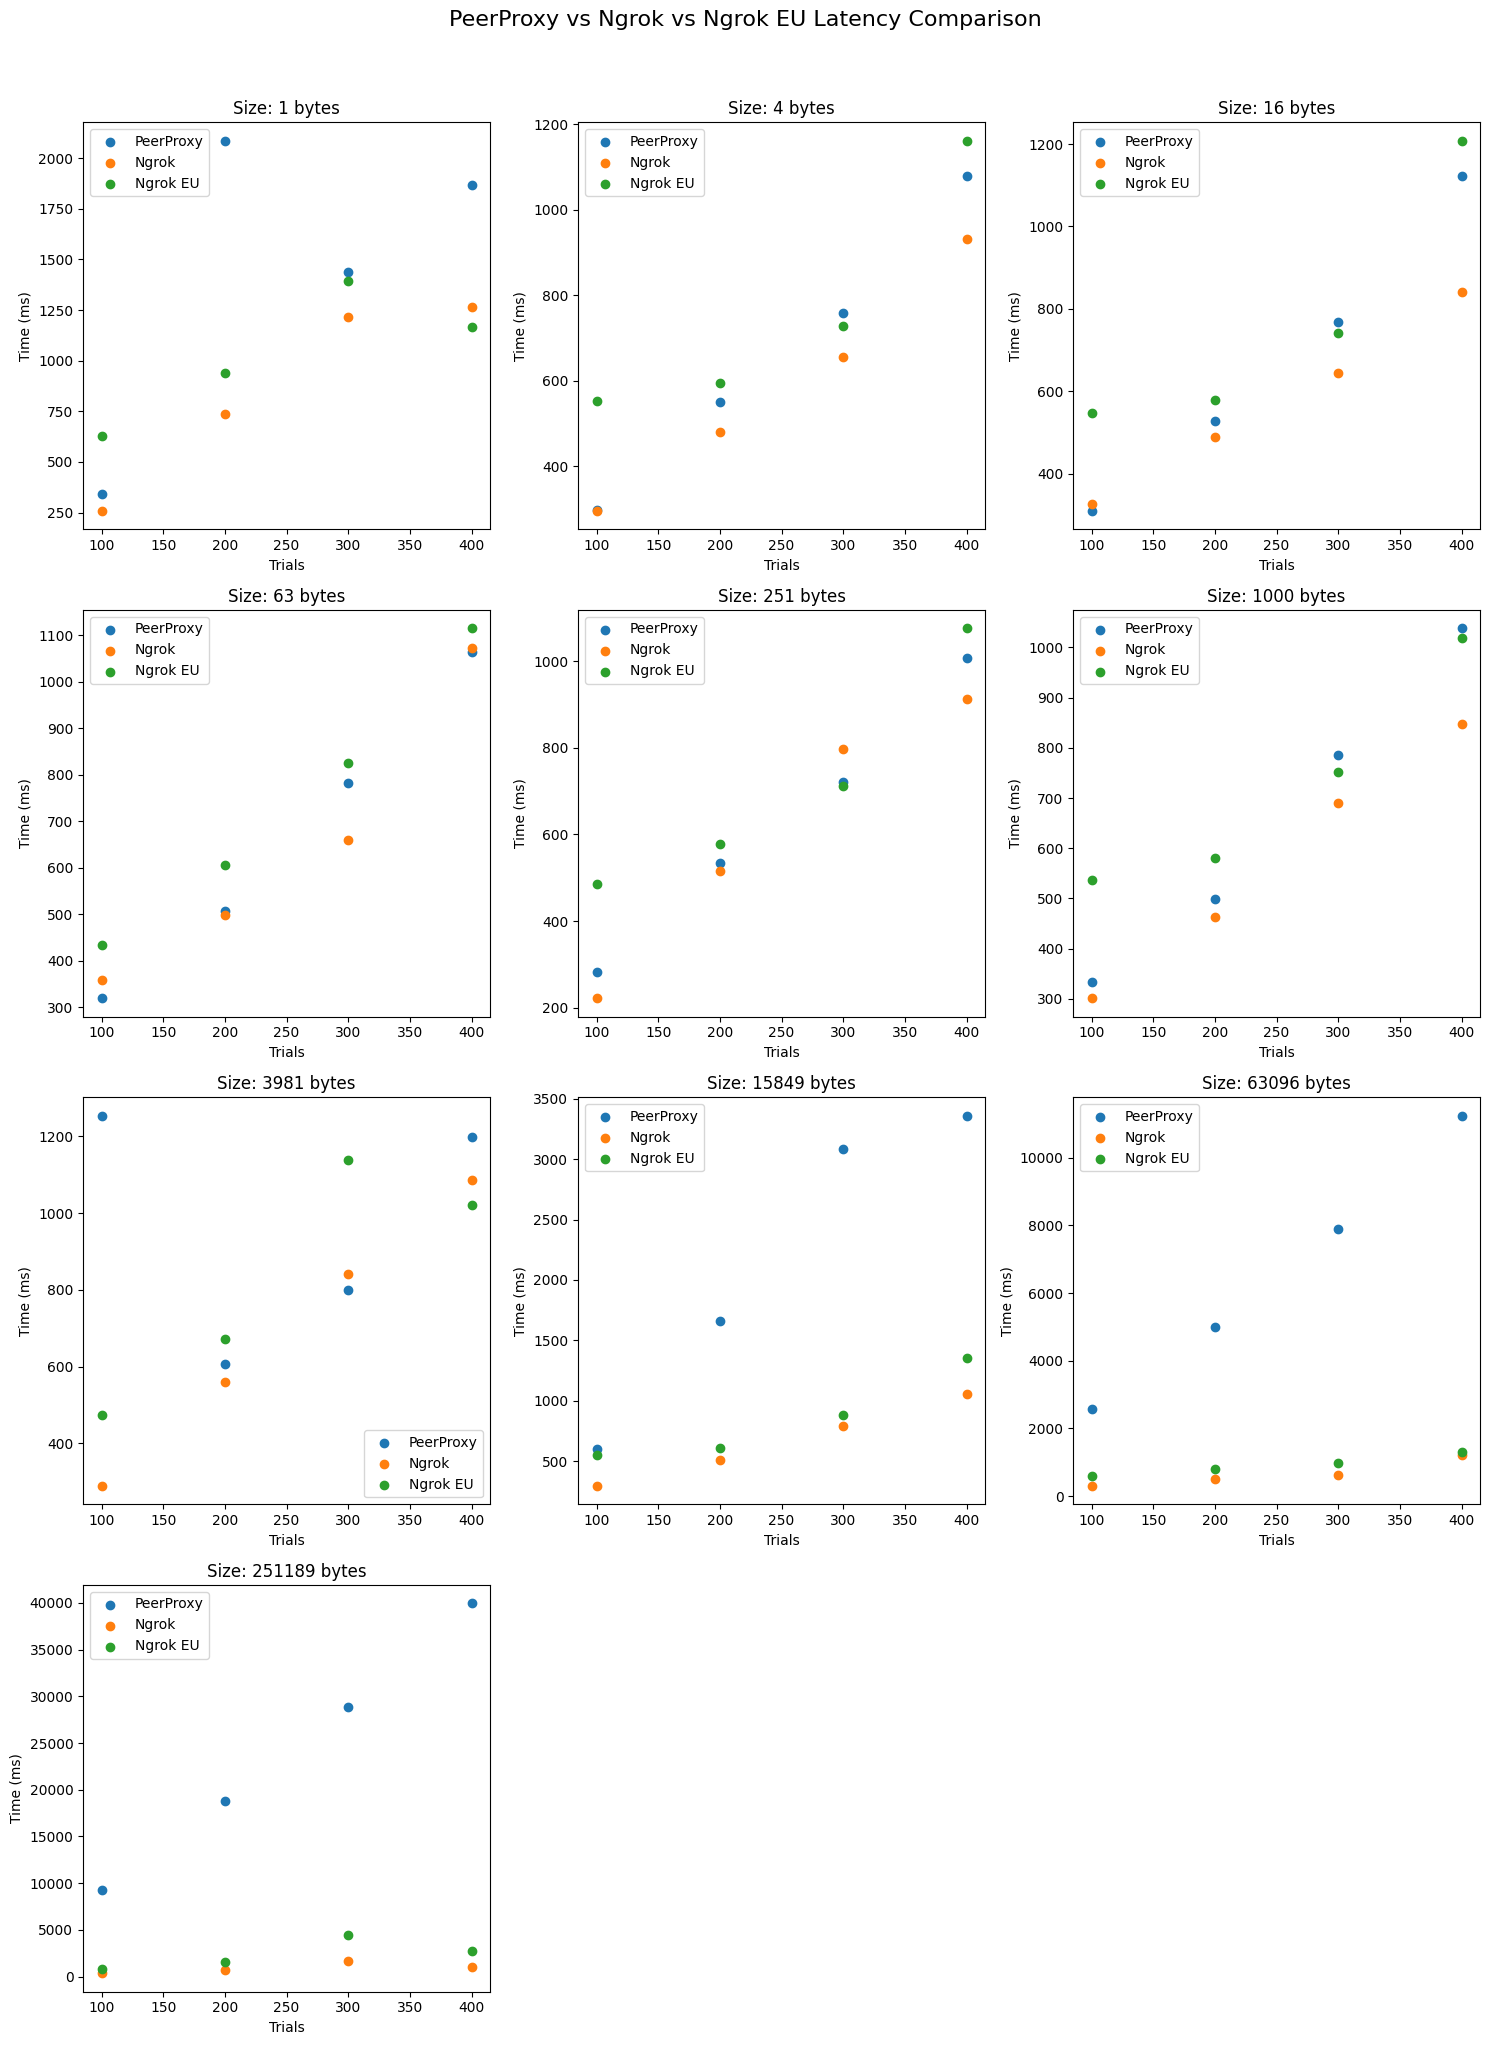

In [14]:

euNgrok = pd.read_csv('results/ngrokEuLatency.csv')

plot_latency_comparison([df, ngrok, euNgrok], ['PeerProxy', 'Ngrok', 'Ngrok EU'], 'PeerProxy vs Ngrok vs Ngrok EU Latency Comparison')

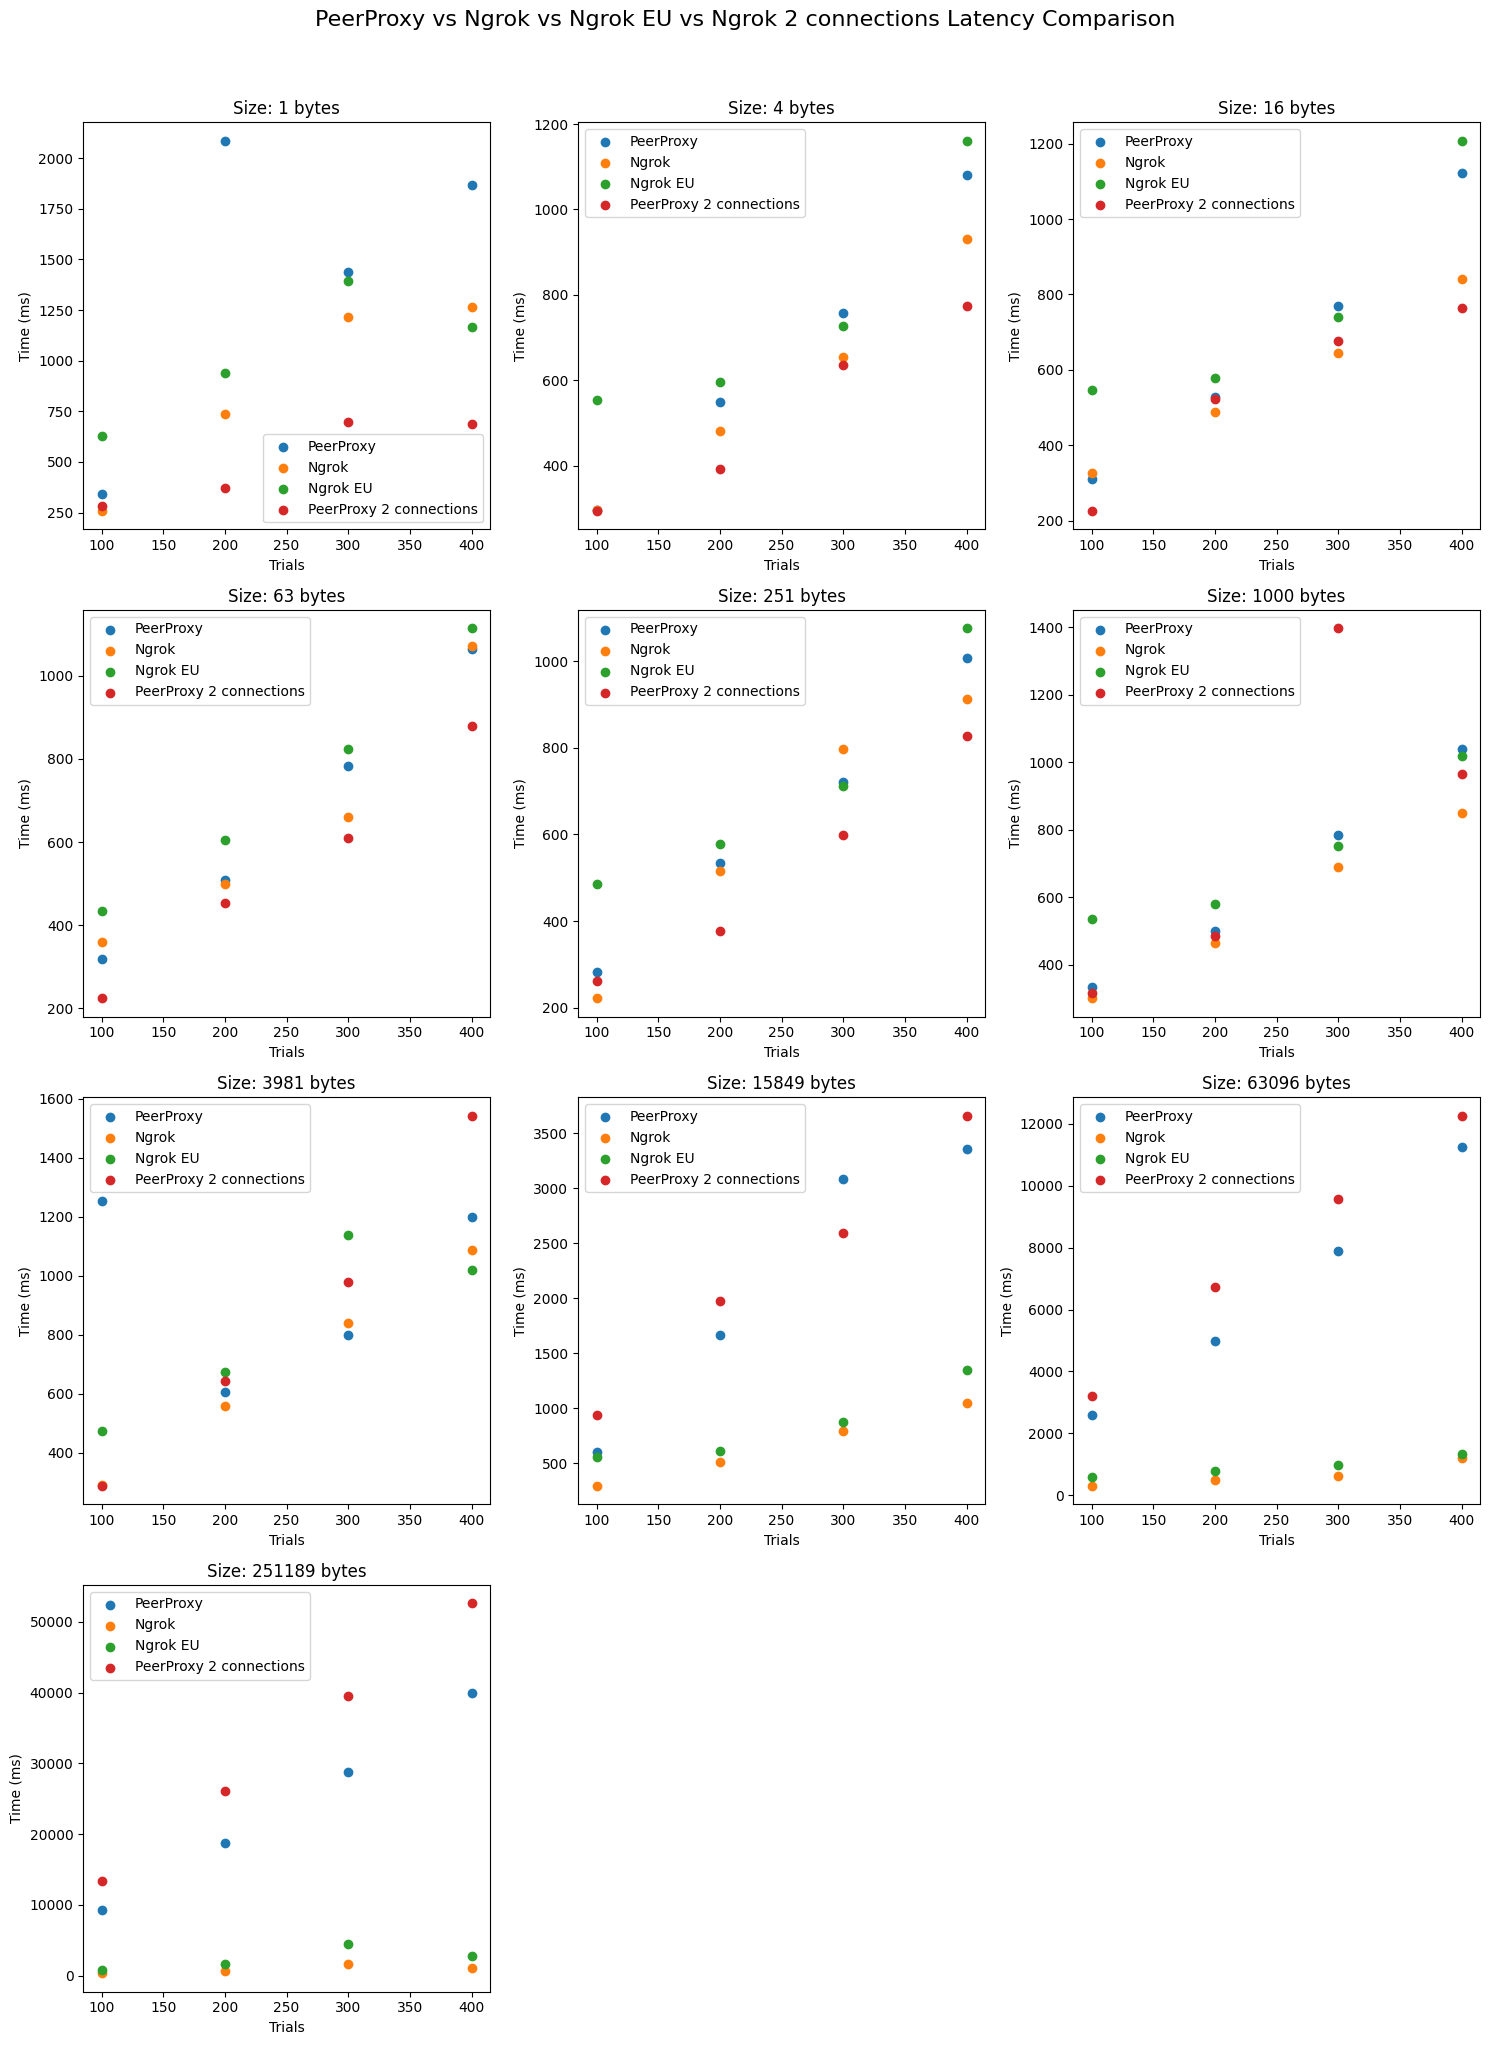

In [15]:
doubleConnection = pd.read_csv('results/twoConnectedLatencyBench.csv')

plot_latency_comparison([df, ngrok, euNgrok, doubleConnection], ['PeerProxy', 'Ngrok', 'Ngrok EU', 'PeerProxy 2 connections'], 'PeerProxy vs Ngrok vs Ngrok EU vs Ngrok 2 connections Latency Comparison')

In [16]:
peerproxyGrouped = df.groupby('Size Response (bytes)').mean()[['Average Latency (ms)']].reset_index()

peerproxyGrouped['Average Latency (ms)'] = peerproxyGrouped['Average Latency (ms)'].round(2)

peerproxyGrouped

,Size Response (bytes),Average Latency (ms)
0,1,5.83
1,4,2.74
2,16,2.78
3,63,2.75
4,251,2.60
5,1000,2.76
6,3981,5.31
7,15849,8.26
8,63096,26.32
9,251189,95.69


In [17]:
ngrokGrouped = ngrok.groupby('Size Response (bytes)').mean()[['Average Latency (ms)']].reset_index()

ngrokGrouped['Average Latency (ms)'] = ngrokGrouped['Average Latency (ms)'].round(2)

In [18]:
ngrokEuGrouped = euNgrok.groupby('Size Response (bytes)').mean()[['Average Latency (ms)']].reset_index()

ngrokEuGrouped['Average Latency (ms)'] = ngrokEuGrouped['Average Latency (ms)'].round(2)

ngrokEuGrouped

,Size Response (bytes),Average Latency (ms)
0,1,4.63
1,4,3.46
2,16,3.46
3,63,3.22
4,251,3.20
5,1000,3.33
6,3981,3.61
7,15849,3.73
8,63096,4.09
9,251189,9.40


In [19]:
# make function to make bytes to readable name
def bytes_to_readable(size):
    if size < 1024:
        return f'{size} B'
    elif size < 1024 ** 2:
        return f'{round(size / 1024)} KB'
    else:
        return f'{round(size / 1024 ** 2)} MB'

In [20]:
mergedDf = pd.merge(peerproxyGrouped, ngrokGrouped, on='Size Response (bytes)', suffixes=(' PeerProxy', ' Ngrok'))


ngrokEuGrouped.rename(columns={'Average Latency (ms)': 'Average Latency (ms) Ngrok EU'}, inplace=True)

mergedDf = pd.merge(mergedDf, ngrokEuGrouped, on='Size Response (bytes)', suffixes=('', ' Ngrok EU'))

# make bytes to readable name
mergedDf['Size Response (bytes)'] = mergedDf['Size Response (bytes)'].apply(bytes_to_readable)



In [21]:
mergedDf

,Size Response (bytes),Average Latency (ms) PeerProxy,Average Latency (ms) Ngrok,Average Latency (ms) Ngrok EU
0,1 B,5.83,3.37,4.63
1,4 B,2.74,2.47,3.46
2,16 B,2.78,2.49,3.46
3,63 B,2.75,2.74,3.22
4,251 B,2.60,2.44,3.20
5,1000 B,2.76,2.44,3.33
6,4 KB,5.31,2.80,3.61
7,15 KB,8.26,2.70,3.73
8,62 KB,26.32,2.66,4.09
9,245 KB,95.69,3.70,9.40


In [22]:
print(mergedDf.to_latex(index=False, float_format="%.2f"))

\begin{tabular}{lrrr}
\toprule
Size Response (bytes) & Average Latency (ms) PeerProxy & Average Latency (ms) Ngrok & Average Latency (ms) Ngrok EU \\
\midrule
1 B & 5.83 & 3.37 & 4.63 \\
4 B & 2.74 & 2.47 & 3.46 \\
16 B & 2.78 & 2.49 & 3.46 \\
63 B & 2.75 & 2.74 & 3.22 \\
251 B & 2.60 & 2.44 & 3.20 \\
1000 B & 2.76 & 2.44 & 3.33 \\
4 KB & 5.31 & 2.80 & 3.61 \\
15 KB & 8.26 & 2.70 & 3.73 \\
62 KB & 26.32 & 2.66 & 4.09 \\
245 KB & 95.69 & 3.70 & 9.40 \\
\bottomrule
\end{tabular}



TypeError: cannot unpack non-iterable int object

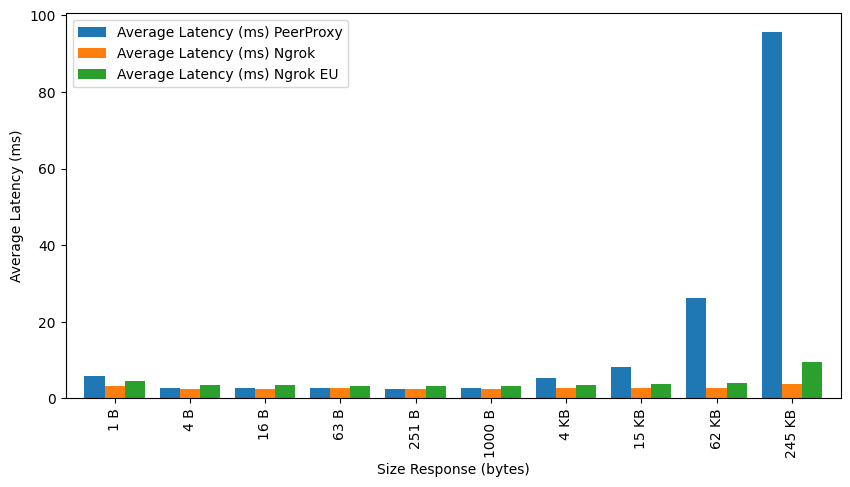

In [23]:
ax = mergedDf.plot(x='Size Response (bytes)', kind='bar', figsize=(10, 5), width=0.8)
ax.set_ylabel('Average Latency (ms)')

# Adding numbers above the bars with a larger offset
for i, p in enumerate(ax.patches):
    
    ax.annotate(str(p.get_height()), 
                (p.get_x() + p.get_width() / 2., p.get_height()), 
                ha='center', va='center', 
                xytext=5,  # Adjusted offset
                textcoords='offset points',
                rotation=45)  # Rotate text at 45 degrees

plt.show()


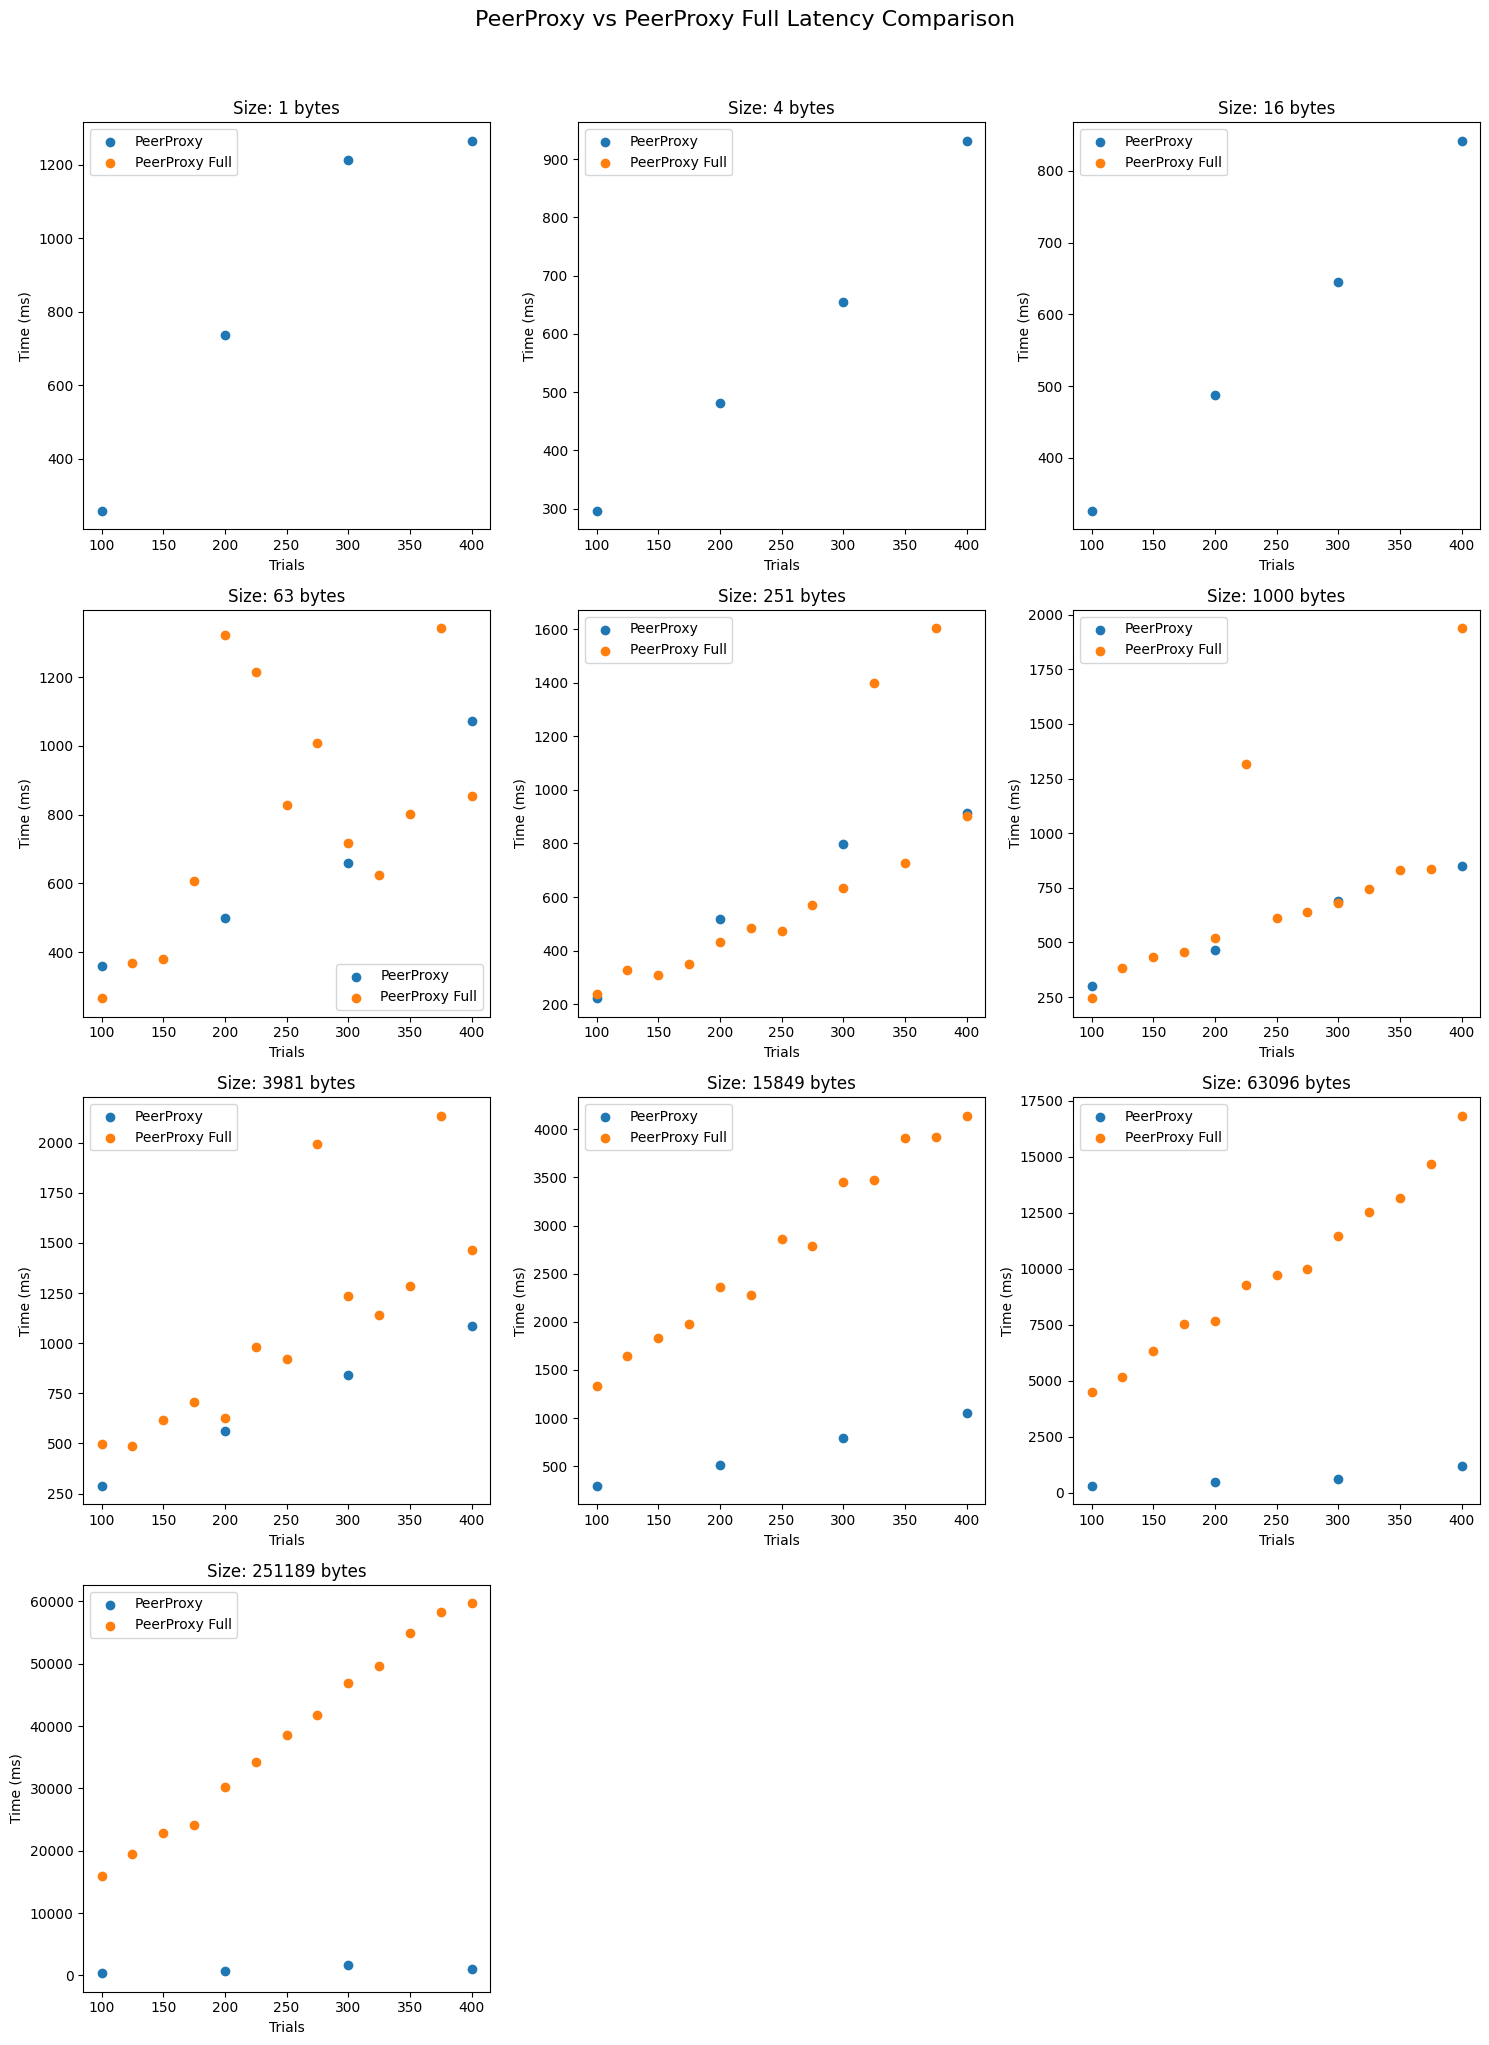

In [27]:
fullPeerProxy = pd.read_csv('results/download/latency/peerproxy.csv')

plot_latency_comparison([ngrok, fullPeerProxy], ['PeerProxy', 'PeerProxy Full'], 'PeerProxy vs PeerProxy Full Latency Comparison')